# Lab 5. Fuzzy Systems
# Task 5.3 Washing Machine Fuzzy Controller
## Problem Descriptions
For simplicity, we only
consider two input variables and one output variable. Their linguistic values are.

         Degree of Dirtiness: SD(small), MD(medium), LD(large)

        Size of Load of Clothes: SL(small), ML(medium), LL(large)

        Washing Time: VS(very short), S(short), M(medium),
                        L(long), VL(very long)


rules:--
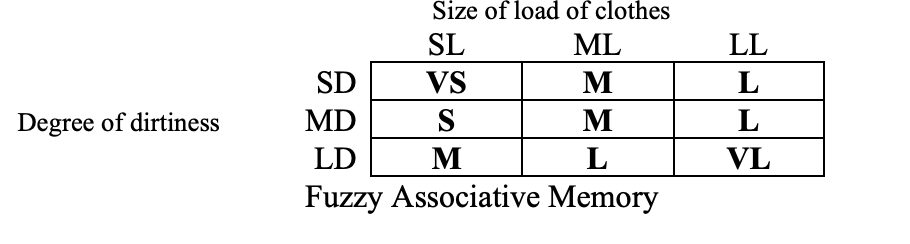

In [ ]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=4f15dbc9812d29ef4d96f39ad04640b925f2ff2b680341f106100de39bb908c3
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
# Linguistic variables for antecedents/consequent
dirtiness = ctrl.Antecedent(np.arange(0, 101, 1), 'dirtiness')
load = ctrl.Antecedent(np.arange(0, 101, 1), 'load')
time = ctrl.Consequent(np.arange(0, 61, 1), 'time')

# membership functions for each linguistic values
dirtiness.automf(3, names=['SD', 'MD', 'LD'])
load.automf(3, names=['SL', 'ML', 'LL'])
time.automf(5, names=['VS', 'S', 'M', 'L', 'VL'])

dirtiness.view()
load.view()
time.view()

In [ ]:
# Define the rules
rule1 = ctrl.Rule(dirtiness['SD'] & load['SL'], time['VS'])
rule2 = ctrl.Rule(dirtiness['SD'] & load['ML'], time['M'])
rule3 = ctrl.Rule(dirtiness['SD'] & load['LL'], time['L'])
rule4 = ctrl.Rule(dirtiness['MD'] & load['SL'], time['S'])
rule5 = ctrl.Rule(dirtiness['MD'] & load['ML'], time['M'])
rule6 = ctrl.Rule(dirtiness['MD'] & load['LL'], time['L'])
rule7 = ctrl.Rule(dirtiness['LD'] & load['SL'], time['M'])
rule8 = ctrl.Rule(dirtiness['LD'] & load['ML'], time['L'])
rule9 = ctrl.Rule(dirtiness['LD'] & load['LL'], time['VL'])

# Create the control system and its simulation
ctrl_sys = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
ctrl_sim = ctrl.ControlSystemSimulation(ctrl_sys)

Washing time: 36.650793650793666


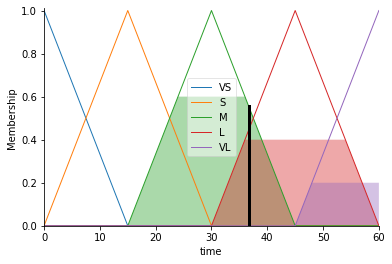

In [ ]:
# Pass inputs to the ControlSystem 
ctrl_sim.inputs({'dirtiness': 60, 'load': 70})

# Crunch the numbers
ctrl_sim.compute()
print("Washing time:", ctrl_sim.output['time'])
time.view(sim=ctrl_sim)


## Discussions

Input to our engine is two antecedents, dirtiness and Load.

* we have added all the rules using below lines:--
      ctrl_sys = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, 
      rule6, rule7, rule8, rule9])

      here each rules is taken from the table given earlier.

* input to the fuzzy system is :-

        dirtiness is 60% and the size of load is 70%.

* output is :-

           washing time is 36.6


* The centre of gravity of the coloured part of graph repersents our solution.
